In [194]:
# The data consists of hourly wage information for workers in Israel. 
# It was collected by categorizing income into groups of 1 NIS per hour, where each column represents a specific wage range.
# Respondents provided their monthly income, the number of hours worked per week, and the number of weeks worked in a month.
# The hourly wage was then calculated by dividing the monthly income by the reported total working hours. 
# The minimum hourly wage is 25 NIS. 
# Based on these data the income of 35% of the population (more than a third) is lower than the minimum wage.
# Explore the data.
# part of your work is to ask the instructor for relevant and imporatnt questions.

Check if the theory "Based on these data the income of 35% of the population (more than a third) is lower than the minimum wage" is correct

In [4]:
import numpy as np
import math
from matplotlib import pyplot as plt

np.random.seed(42)
N = 8_000_000
bins = np.arange(0, 151)

# build baseline PDFs
x = np.arange(0, 151)

# 1. main peak: Reset to have its mode between 20-30.
k, theta, shift = 7, 2, 10
main_pdf = np.zeros_like(x, dtype=float)
mask = x >= shift
xs = x[mask] - shift
main_pdf[mask] = (xs ** (k - 1) * np.exp(-xs / theta)) / (theta ** k * math.gamma(k))

# 2. secondary peak: The sharp peak at 7.5
mu_sec, sigma_sec = 5.5, 1.2
sec_peak_pdf = np.exp(-(x - mu_sec) ** 2 / (2 * sigma_sec ** 2)) / (sigma_sec * np.sqrt(2 * np.pi))

# 3. low bump: The component for the 10-20 range
mu_bump, sigma_bump = 25, 2.5
low_bump_pdf = np.exp(-(x - mu_bump) ** 2 / (2 * sigma_bump ** 2)) / (sigma_bump * np.sqrt(2 * np.pi))

# 4. mid-range area: A NEW broad distribution to add area between 30 and 80.
mu_mid, sigma_mid = 40, 20
mid_range_pdf = np.exp(-(x - mu_mid) ** 2 / (2 * sigma_mid ** 2)) / (sigma_mid * np.sqrt(2 * np.pi))

# 5. tail peak: The wide gaussian for the tail
mu_tail, sigma_tail = 60, 30
tail_pdf = np.exp(-(x - mu_tail) ** 2 / (2 * sigma_tail ** 2)) / (sigma_tail * np.sqrt(2 * np.pi))


# mix the FIVE components with adjusted weights and add multiplicative noise
baseline = (0.4 * main_pdf +
            0.05 * sec_peak_pdf +
            0.025 * low_bump_pdf +
            0.300 * mid_range_pdf +
            0.3 * tail_pdf)
baseline *= np.exp(np.random.normal(0, 0.30, size=baseline.shape))
baseline += 1e-12
baseline /= baseline.sum()

# sample counts then build integer dataset
counts = np.random.multinomial(N, baseline)
data = np.repeat(x, counts)

# add within-bin jitter, clip, cast to int
data = np.clip(np.rint(data + np.random.uniform(-0.5, 0.5, size=data.shape)), 0, 150).astype(int)

# histogram (one bin per integer)
hist, _ = np.histogram(data, bins=bins)
density = hist / N

1.0000000000000002


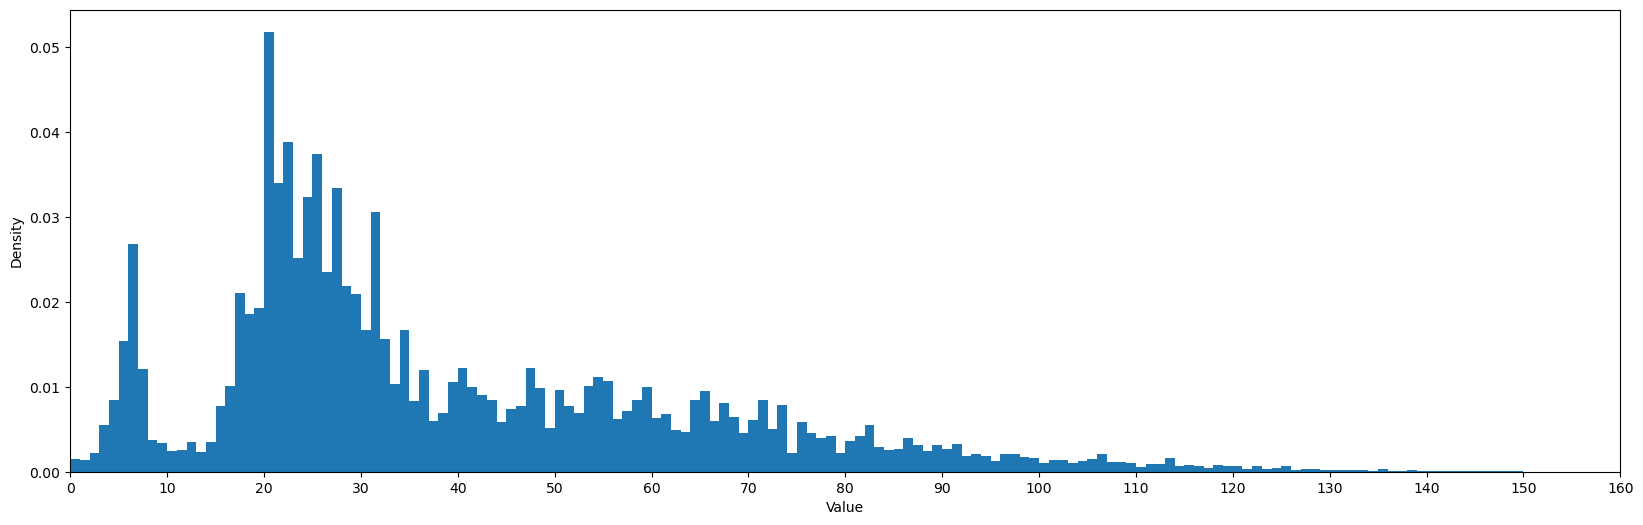

In [6]:
plt.figure(figsize=(20, 6))
plt.bar(bins[:-1], density, width=1, align='edge')
plt.xlim(0, 150)
plt.xlabel('Value')
plt.ylabel('Density')
plt.xticks([0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160])
plt.show()


In [ ]:
len(data[np.where((data<25))[0]])/len(data)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
mean = 4.5
std_dev = 1.5
num_samples = 1000


# Generate the data
data = np.random.normal(loc=mean, scale=std_dev, size=num_samples)
data = data[data > 0]

# Plot the distribution
plt.figure(figsize=(8, 6))
plt.hist(data, bins=30, edgecolor='black', alpha=0.7)
plt.title('Normal Distribution with Mean = 4.5 and Std Dev = 3')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()
